In [1]:
%run functions.ipynb

In [2]:
import codecs
import math
import random
import string
import time
import numpy as np
import torch
from sklearn.metrics import accuracy_score

'''
Don't change these constants for the classification task.
You may use different copies for the sentence generation model.
'''
languages = ["af", "cn", "de", "fi", "fr", "in", "ir", "pk", "za"]
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)


import unicodedata

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []
category_lines_test = {}
all_categories_test = []
# Read a file and split into lines
def readLines(filename):
    lines = codecs.open(filename, "r",encoding='utf-8', errors='ignore').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

In [3]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/cities/train/*.txt'))


for filename in findFiles('data/cities/train/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines
n_categories= len(all_categories)

['data/cities/train/in.txt', 'data/cities/train/pk.txt', 'data/cities/train/fr.txt', 'data/cities/train/af.txt', 'data/cities/train/cn.txt', 'data/cities/train/za.txt', 'data/cities/train/fi.txt', 'data/cities/train/ir.txt', 'data/cities/train/de.txt']


In [4]:
for filename in findFiles('data/cities/val/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories_test.append(category)
    lines = readLines(filename)
    category_lines_test[category] = lines
n_categories_test= len(all_categories_test)

5000 5% (0m 9s) 2.1118 ssunanhsien / ir ✗ (cn)
10000 10% (0m 19s) 2.1426 shaikh kendi / fi ✗ (ir)
15000 15% (0m 29s) 2.1473 zaoshaogou / cn ✗ (za)
20000 20% (0m 38s) 2.1744 myza labrags / fr ✗ (za)
25000 25% (0m 47s) 1.5743 mojia liangting / cn ✓
30000 30% (0m 57s) 1.2205 alpuderesi koyu / de ✓
35000 35% (1m 6s) 1.0523 ghatanwala goth / pk ✓
40000 40% (1m 15s) 1.3706 friendly corner / de ✗ (fr)
45000 45% (1m 24s) 2.6895 yagza / za ✗ (cn)
50000 50% (1m 33s) 1.4583 sar bone reza / de ✗ (za)
55000 55% (1m 42s) 2.6983 mori kazak zizhixian / pk ✗ (za)
60000 60% (1m 52s) 0.3567 los barrios de luna / de ✓
65000 65% (2m 1s) 1.7979 oirawaro / fi ✗ (ir)
70000 70% (2m 10s) 0.7697 chak  tda / pk ✓
75000 75% (2m 19s) 2.7041 afourirh / fi ✗ (af)
80000 80% (2m 28s) 2.0541 ma'va / za ✗ (ir)
85000 85% (2m 37s) 2.0952 santhi / cn ✗ (pk)
90000 90% (2m 47s) 0.9446 verdek / de ✓
95000 95% (2m 56s) 1.0488 fontclair / fr ✓
100000 100% (3m 5s) 1.4000 bessaysurallier / de ✗ (fr)


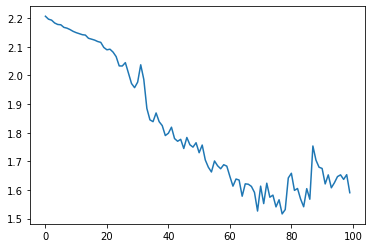

In [5]:
#train on rnn
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)
train_model(all_categories,category_lines,rnn,learning_rate=0.001)

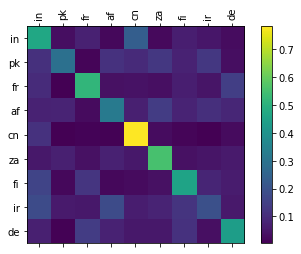

confusion= tensor([[0.4669, 0.0317, 0.0746, 0.0196, 0.2358, 0.0224, 0.0680, 0.0522, 0.0289],
        [0.1124, 0.2919, 0.0136, 0.1142, 0.0961, 0.1287, 0.0798, 0.1306, 0.0326],
        [0.0987, 0.0038, 0.5172, 0.0383, 0.0421, 0.0345, 0.0699, 0.0469, 0.1485],
        [0.0775, 0.0802, 0.0279, 0.3207, 0.0739, 0.1423, 0.0829, 0.1081, 0.0865],
        [0.1151, 0.0046, 0.0111, 0.0093, 0.7837, 0.0297, 0.0130, 0.0065, 0.0269],
        [0.0535, 0.0733, 0.0403, 0.0749, 0.0551, 0.5572, 0.0387, 0.0477, 0.0593],
        [0.1630, 0.0219, 0.1236, 0.0202, 0.0272, 0.0403, 0.4575, 0.0833, 0.0631],
        [0.1813, 0.0616, 0.0554, 0.1830, 0.0652, 0.0812, 0.1196, 0.1946, 0.0580],
        [0.0725, 0.0081, 0.1423, 0.0797, 0.0546, 0.0537, 0.1146, 0.0358, 0.4387]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.34      0.47      0.39      1073
         1.0       0.50      0.29      0.37      1103
         2.0       0.50      0.52      0.51      1044
         

In [6]:
#evaluate model on the training set
evaluate_model(all_categories,category_lines,rnn)

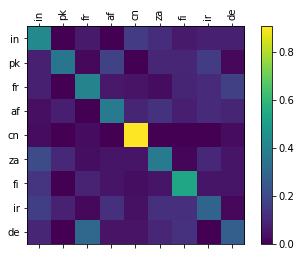

confusion= tensor([[0.4267, 0.0000, 0.0667, 0.0000, 0.1600, 0.1200, 0.0667, 0.0800, 0.0800],
        [0.0784, 0.3529, 0.0196, 0.1765, 0.0000, 0.0980, 0.0980, 0.1569, 0.0196],
        [0.0781, 0.0000, 0.4062, 0.0625, 0.0469, 0.0312, 0.0938, 0.1094, 0.1719],
        [0.0377, 0.0755, 0.0000, 0.3774, 0.0943, 0.1321, 0.0755, 0.1132, 0.0943],
        [0.0312, 0.0000, 0.0312, 0.0000, 0.9062, 0.0000, 0.0000, 0.0000, 0.0312],
        [0.2105, 0.1053, 0.0351, 0.0526, 0.0526, 0.3684, 0.0175, 0.1053, 0.0526],
        [0.1379, 0.0000, 0.0862, 0.0517, 0.0345, 0.0517, 0.5345, 0.0517, 0.0517],
        [0.1667, 0.0833, 0.0208, 0.1250, 0.0417, 0.1250, 0.1250, 0.2917, 0.0208],
        [0.0968, 0.0000, 0.3065, 0.0484, 0.0484, 0.0968, 0.1290, 0.0000, 0.2742]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.41      0.43      0.42        75
         1.0       0.56      0.35      0.43        51
         2.0       0.43      0.41      0.42        64
         

In [7]:
#evaluate model on the validation set
evaluate_model(all_categories_test,category_lines_test,rnn,500)

5000 5% (0m 10s) 2.1266 yangchiachai / cn ✓
10000 10% (0m 19s) 2.1935 pullir / pk ✗ (ir)
15000 15% (0m 29s) 2.1265 sandzhi / in ✗ (cn)
20000 20% (0m 39s) 2.2274 bakersfield / cn ✗ (fi)
25000 25% (0m 50s) 2.1818 donfins / cn ✗ (fi)
30000 30% (1m 0s) 2.2810 seyssessaves / za ✗ (fr)
35000 35% (1m 10s) 2.1326 shichaomen / pk ✗ (cn)
40000 40% (1m 20s) 2.3308 bassoues d'armagnac / cn ✗ (fr)
45000 45% (1m 30s) 2.1324 guzaribala / pk ✗ (za)
50000 50% (1m 41s) 2.1642 san antonio de las alazanas / pk ✗ (za)
55000 55% (1m 51s) 2.1175 zaoyi / cn ✓
60000 60% (2m 2s) 2.1433 pathan colony / cn ✗ (pk)
65000 65% (2m 13s) 2.2537 londo / za ✗ (af)
70000 70% (2m 23s) 2.1383 tongtianyan / pk ✗ (cn)
75000 75% (2m 33s) 2.2769 neder lert / cn ✗ (de)
80000 80% (2m 43s) 2.2610 birgilda / pk ✗ (ir)
85000 85% (2m 53s) 2.2692 saru kola / pk ✗ (ir)
90000 90% (3m 2s) 2.1292 jianzhang / za ✗ (cn)
95000 95% (3m 12s) 2.2482 zarjoy / pk ✗ (af)
100000 100% (3m 21s) 2.1177 shexialianzhong / za ✗ (cn)


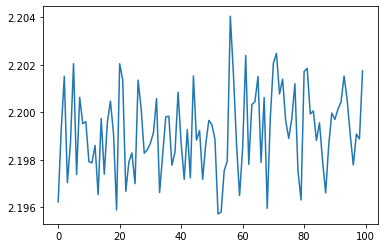

In [17]:
#train on rnn with a bigger learning rate
n_hidden = 128
rnn2 = RNN(n_letters, n_hidden, n_categories)
train_model(all_categories,category_lines,rnn2,learning_rate=0.005)

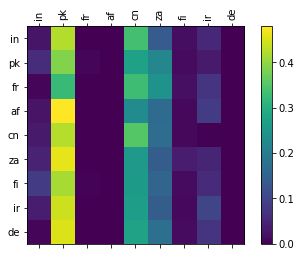

confusion= tensor([[0.0281, 0.4244, 0.0000, 0.0000, 0.3367, 0.1385, 0.0181, 0.0543, 0.0000],
        [0.0600, 0.3889, 0.0063, 0.0000, 0.2742, 0.2222, 0.0134, 0.0349, 0.0000],
        [0.0063, 0.3232, 0.0018, 0.0000, 0.3303, 0.2451, 0.0197, 0.0736, 0.0000],
        [0.0260, 0.4794, 0.0009, 0.0000, 0.2312, 0.1676, 0.0099, 0.0851, 0.0000],
        [0.0355, 0.4253, 0.0009, 0.0000, 0.3525, 0.1712, 0.0109, 0.0036, 0.0000],
        [0.0479, 0.4616, 0.0009, 0.0000, 0.2602, 0.1418, 0.0379, 0.0497, 0.0000],
        [0.0845, 0.4169, 0.0056, 0.0000, 0.2618, 0.1569, 0.0149, 0.0594, 0.0000],
        [0.0357, 0.4428, 0.0018, 0.0000, 0.2672, 0.1409, 0.0110, 0.1006, 0.0000],
        [0.0060, 0.4549, 0.0017, 0.0000, 0.2760, 0.1755, 0.0136, 0.0724, 0.0000]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.09      0.03      0.04      1105
         1.0       0.10      0.39      0.16      1116
         2.0       0.09      0.00      0.00      1114
         

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
#evaluate model on the training set
evaluate_model(all_categories,category_lines,rnn2)

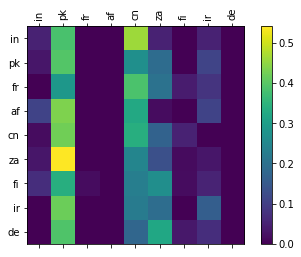

confusion= tensor([[0.0513, 0.3846, 0.0000, 0.0000, 0.4615, 0.0513, 0.0000, 0.0513, 0.0000],
        [0.0317, 0.3968, 0.0000, 0.0000, 0.2698, 0.1905, 0.0000, 0.1111, 0.0000],
        [0.0000, 0.2857, 0.0000, 0.0000, 0.3878, 0.2041, 0.0408, 0.0816, 0.0000],
        [0.1091, 0.4364, 0.0000, 0.0000, 0.3273, 0.0182, 0.0000, 0.1091, 0.0000],
        [0.0169, 0.4237, 0.0000, 0.0000, 0.3390, 0.1695, 0.0508, 0.0000, 0.0000],
        [0.0328, 0.5410, 0.0000, 0.0000, 0.2459, 0.1311, 0.0164, 0.0328, 0.0000],
        [0.0714, 0.3393, 0.0179, 0.0000, 0.2321, 0.2679, 0.0179, 0.0536, 0.0000],
        [0.0000, 0.4194, 0.0000, 0.0000, 0.2258, 0.1935, 0.0000, 0.1613, 0.0000],
        [0.0000, 0.3929, 0.0000, 0.0000, 0.1786, 0.3214, 0.0357, 0.0714, 0.0000]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.12      0.05      0.07        39
         1.0       0.12      0.40      0.19        63
         2.0       0.00      0.00      0.00        49
         

In [19]:
#evaluate model on the validation set
evaluate_model(all_categories_test,category_lines_test,rnn2,500)

5000 5% (0m 14s) 2.2804 modkhun / pk ✗ (ir)
10000 10% (0m 28s) 2.1291 erfangyuan / af ✗ (cn)
15000 15% (0m 42s) 2.1472 chainpuriya / pk ✗ (in)
20000 20% (0m 59s) 2.2187 jhok bhurani / fi ✗ (pk)
25000 25% (1m 14s) 2.2376 id zaleb yahia / fi ✗ (za)
30000 30% (1m 29s) 2.2175 masanteng / in ✗ (za)
35000 35% (1m 42s) 2.0310 mucholalinga / in ✓
40000 40% (1m 55s) 2.1065 shanchenjia / in ✗ (cn)
45000 45% (2m 10s) 2.2099 deugdvlei / fi ✗ (za)
50000 50% (2m 25s) 2.3044 deh kuli ye eslam nazar / fi ✗ (ir)
55000 55% (2m 39s) 2.0989 chahar darah / af ✓
60000 60% (2m 53s) 2.0948 kotka samandar khan / fi ✗ (pk)
65000 65% (3m 7s) 2.1769 kharolian urichian / cn ✗ (pk)
70000 70% (3m 22s) 2.2492 berezanskaya / pk ✗ (za)
75000 75% (3m 36s) 2.2109 rancho la gamuza / fi ✗ (za)
80000 80% (3m 51s) 2.1722 mbanza mussende / fi ✗ (za)
85000 85% (4m 5s) 2.2075 nagu / fi ✗ (cn)
90000 90% (4m 19s) 2.1172 hapchinni / fi ✗ (in)
95000 95% (4m 34s) 2.2522 blangiel / fi ✗ (fr)
100000 100% (4m 48s) 2.1798 chakai / fi ✗ 

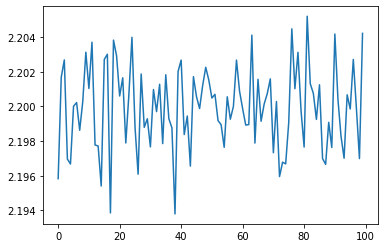

In [20]:
#train on rnn_dropout
n_hidden = 128
rnn_dropout = RNN_dropout(n_letters, n_hidden, n_categories)
train_model(all_categories,category_lines,rnn_dropout,learning_rate=0.001)

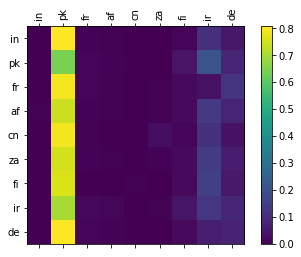

confusion= tensor([[0.0018, 0.8066, 0.0064, 0.0037, 0.0009, 0.0009, 0.0147, 0.1114, 0.0534],
        [0.0009, 0.6458, 0.0109, 0.0073, 0.0009, 0.0018, 0.0436, 0.2062, 0.0827],
        [0.0026, 0.7964, 0.0095, 0.0043, 0.0000, 0.0035, 0.0217, 0.0364, 0.1256],
        [0.0037, 0.7416, 0.0075, 0.0047, 0.0019, 0.0047, 0.0196, 0.1325, 0.0840],
        [0.0000, 0.7920, 0.0052, 0.0000, 0.0009, 0.0306, 0.0140, 0.1180, 0.0393],
        [0.0009, 0.7514, 0.0090, 0.0054, 0.0000, 0.0063, 0.0208, 0.1438, 0.0624],
        [0.0009, 0.7618, 0.0027, 0.0000, 0.0045, 0.0018, 0.0200, 0.1527, 0.0555],
        [0.0018, 0.7017, 0.0189, 0.0108, 0.0000, 0.0054, 0.0467, 0.1276, 0.0872],
        [0.0018, 0.8069, 0.0098, 0.0071, 0.0018, 0.0027, 0.0214, 0.0685, 0.0801]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.12      0.00      0.00      1086
         1.0       0.09      0.65      0.16      1101
         2.0       0.12      0.01      0.02      1154
         

In [9]:
#evaluate model on the training set
evaluate_model(all_categories,category_lines,rnn_dropout)

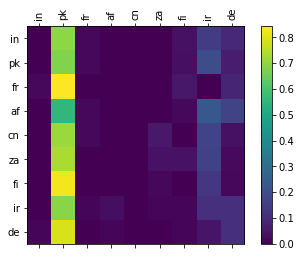

confusion= tensor([[0.0000, 0.6981, 0.0189, 0.0000, 0.0000, 0.0000, 0.0377, 0.1509, 0.0943],
        [0.0000, 0.6833, 0.0167, 0.0000, 0.0000, 0.0000, 0.0333, 0.2000, 0.0667],
        [0.0175, 0.8421, 0.0000, 0.0000, 0.0000, 0.0000, 0.0526, 0.0000, 0.0877],
        [0.0000, 0.5577, 0.0192, 0.0000, 0.0000, 0.0000, 0.0192, 0.2308, 0.1731],
        [0.0000, 0.7170, 0.0189, 0.0000, 0.0000, 0.0566, 0.0000, 0.1698, 0.0377],
        [0.0000, 0.7347, 0.0000, 0.0000, 0.0000, 0.0408, 0.0408, 0.1633, 0.0204],
        [0.0000, 0.8269, 0.0000, 0.0000, 0.0000, 0.0192, 0.0000, 0.1346, 0.0192],
        [0.0000, 0.6935, 0.0161, 0.0323, 0.0000, 0.0161, 0.0161, 0.1129, 0.1129],
        [0.0161, 0.7903, 0.0000, 0.0161, 0.0000, 0.0000, 0.0161, 0.0484, 0.1129]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        53
         1.0       0.11      0.68      0.19        60
         2.0       0.00      0.00      0.00        57
         

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
#evaluate model on the validation set
evaluate_model(all_categories_test,category_lines_test,rnn_dropout,500)

5000 5% (0m 14s) 2.1333 vahingirt / fi ✗ (in)
10000 10% (0m 29s) 2.1204 goth seth allah / af ✗ (pk)
15000 15% (0m 43s) 2.1814 yanghuakengcun / af ✗ (cn)
20000 20% (0m 58s) 2.2152 menglichen / fi ✗ (cn)
25000 25% (1m 12s) 2.1974 shengjiaba xiang / in ✗ (cn)
30000 30% (1m 26s) 2.2284 madaotou xiang / af ✗ (cn)
35000 35% (1m 40s) 2.2271 meijiawobao / fi ✗ (cn)
40000 40% (1m 55s) 2.1911 fusai / fi ✗ (pk)
45000 45% (2m 10s) 2.1956 qiaoshuwei / fi ✗ (cn)
50000 50% (2m 24s) 2.1278 khewas / fi ✗ (pk)
55000 55% (2m 39s) 2.1211 chazellel'echo / fr ✓
60000 60% (2m 53s) 2.2582 lezan / pk ✗ (za)
65000 65% (3m 8s) 2.2180 rosund / af ✗ (fi)
70000 70% (3m 23s) 2.0754 pitkalahti / fi ✓
75000 75% (3m 37s) 2.1030 porfilov / cn ✗ (fi)
80000 80% (3m 52s) 2.1699 boutdupontdelarn / cn ✗ (fr)
85000 85% (4m 6s) 2.1818 chak one hundredsevenfifteen l / pk ✗ (fi)
90000 90% (4m 20s) 2.1353 youlougou / fi ✗ (cn)
95000 95% (4m 35s) 2.1672 andrafiavoroka / in ✗ (fi)
100000 100% (4m 49s) 2.0323 madetkoski / fi ✓


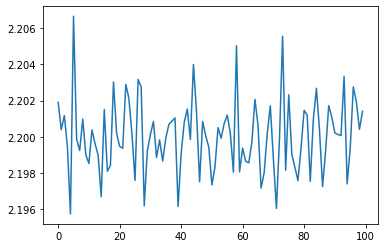

In [21]:
#train on rnn_dropout with a bigger learning rate
n_hidden = 128
rnn_dropout2 = RNN_dropout(n_letters, n_hidden, n_categories)
train_model(all_categories,category_lines,rnn_dropout,learning_rate=0.005)

5000 5% (0m 9s) 2.3108 corozalito / af ✗ (za)
10000 10% (0m 18s) 2.1359 kot akbar khan / fi ✗ (pk)
15000 15% (0m 27s) 2.2135 mapijianggou / fi ✗ (cn)
20000 20% (0m 36s) 2.2408 kafr al jammalah / af ✗ (fr)
25000 25% (0m 45s) 2.2452 meixdevantvirton / fi ✗ (ir)
30000 30% (0m 54s) 2.1105 quartier petite lezarde / pk ✗ (de)
35000 35% (1m 3s) 2.1546 markt einersheim / af ✗ (de)
40000 40% (1m 13s) 2.1378 chohla / fi ✗ (pk)
45000 45% (1m 22s) 2.2974 gezanipoyen / fi ✗ (za)
50000 50% (1m 31s) 2.2242 deliyak / af ✗ (ir)
55000 55% (1m 40s) 2.2719 tsaoping / fi ✗ (cn)
60000 60% (1m 49s) 2.2682 lalheue / pk ✗ (fr)
65000 65% (1m 58s) 2.2771 aghajan / fi ✗ (ir)
70000 70% (2m 7s) 2.1507 nanhia / af ✗ (fi)
75000 75% (2m 17s) 2.2490 hegins / fi ✗ (in)
80000 80% (2m 26s) 2.2158 leiping / fi ✗ (in)
85000 85% (2m 35s) 2.1272 tatar saiyidan / fi ✗ (pk)
90000 90% (2m 44s) 2.1128 dersan kulon / de ✓
95000 95% (2m 54s) 2.2182 shiaokou / fi ✗ (cn)
100000 100% (3m 4s) 2.1963 kacala / fi ✗ (af)


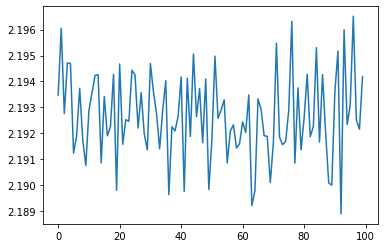

In [11]:
#train on rnn_noZeroInit
n_hidden = 128
rnn_noZeroInit = RNN_noZeroInit(n_letters, n_hidden, n_categories)
train_model(all_categories,category_lines,rnn_noZeroInit,learning_rate=0.001)

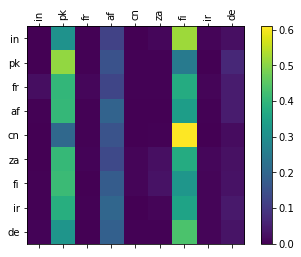

confusion= tensor([[0.0000, 0.3117, 0.0038, 0.1211, 0.0009, 0.0113, 0.5192, 0.0075, 0.0244],
        [0.0018, 0.5106, 0.0046, 0.1536, 0.0037, 0.0046, 0.2521, 0.0018, 0.0672],
        [0.0226, 0.4042, 0.0118, 0.1275, 0.0027, 0.0027, 0.3743, 0.0081, 0.0461],
        [0.0045, 0.4056, 0.0036, 0.1933, 0.0009, 0.0018, 0.3403, 0.0036, 0.0463],
        [0.0009, 0.2061, 0.0026, 0.1553, 0.0000, 0.0035, 0.6096, 0.0009, 0.0211],
        [0.0009, 0.4080, 0.0063, 0.1351, 0.0082, 0.0254, 0.3762, 0.0118, 0.0281],
        [0.0043, 0.4159, 0.0017, 0.1785, 0.0094, 0.0307, 0.3211, 0.0094, 0.0290],
        [0.0027, 0.3810, 0.0027, 0.2015, 0.0018, 0.0082, 0.3537, 0.0073, 0.0410],
        [0.0071, 0.3189, 0.0018, 0.1869, 0.0027, 0.0044, 0.4367, 0.0089, 0.0328]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1065
         1.0       0.15      0.51      0.23      1087
         2.0       0.30      0.01      0.02      1106
         

In [12]:
#evaluate model on the training set
evaluate_model(all_categories,category_lines,rnn_noZeroInit)

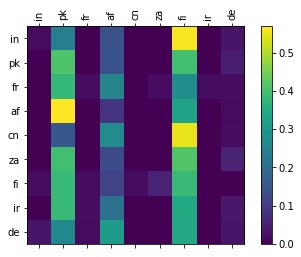

confusion= tensor([[0.0175, 0.2456, 0.0000, 0.1404, 0.0000, 0.0000, 0.5614, 0.0000, 0.0351],
        [0.0000, 0.4127, 0.0000, 0.1429, 0.0000, 0.0000, 0.3968, 0.0000, 0.0476],
        [0.0000, 0.3800, 0.0200, 0.2600, 0.0000, 0.0200, 0.2800, 0.0200, 0.0200],
        [0.0000, 0.5690, 0.0000, 0.0862, 0.0000, 0.0000, 0.3276, 0.0000, 0.0172],
        [0.0000, 0.1569, 0.0000, 0.2745, 0.0000, 0.0000, 0.5490, 0.0000, 0.0196],
        [0.0000, 0.3962, 0.0000, 0.1321, 0.0000, 0.0000, 0.4151, 0.0000, 0.0566],
        [0.0192, 0.3846, 0.0192, 0.1154, 0.0192, 0.0577, 0.3846, 0.0000, 0.0000],
        [0.0000, 0.3846, 0.0192, 0.2115, 0.0000, 0.0000, 0.3462, 0.0000, 0.0385],
        [0.0312, 0.2656, 0.0156, 0.3125, 0.0000, 0.0000, 0.3438, 0.0000, 0.0312]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.25      0.02      0.03        57
         1.0       0.15      0.41      0.22        63
         2.0       0.25      0.02      0.04        50
         

In [13]:
#evaluate model on the validation set
evaluate_model(all_categories_test,category_lines_test,rnn_noZeroInit,500)

5000 5% (0m 10s) 2.2455 sahl ed din / fi ✗ (ir)
10000 10% (0m 20s) 2.2477 tole hasan / fi ✗ (af)
15000 15% (0m 31s) 2.2167 zeiwa / af ✗ (ir)
20000 20% (0m 41s) 2.3007 zaouiet sidi bou beker / fi ✗ (za)
25000 25% (0m 51s) 2.2629 vogelenzang / fi ✗ (za)
30000 30% (1m 1s) 2.2839 bastekan / fi ✗ (ir)
35000 35% (1m 11s) 2.1839 fida ali bak / af ✗ (fi)
40000 40% (1m 21s) 2.2314 sanssacl'eglise / pk ✗ (fr)
45000 45% (1m 31s) 2.1709 skogboda / de ✗ (fi)
50000 50% (1m 41s) 2.2212 iranumu / fi ✗ (ir)
55000 55% (1m 52s) 2.1766 mirsekar / pk ✗ (af)
60000 60% (2m 2s) 2.1426 arzam / de ✗ (za)
65000 65% (2m 14s) 2.1838 sekamkhaza / pk ✗ (za)
70000 70% (2m 25s) 2.3236 xinzhuangbu / fi ✗ (in)
75000 75% (2m 35s) 2.2341 asyaye murdian / fi ✗ (af)
80000 80% (2m 45s) 2.2440 leini / fi ✗ (in)
85000 85% (2m 56s) 2.1891 potianzi / pk ✗ (cn)
90000 90% (3m 6s) 2.1332 dugha / pk ✓
95000 95% (3m 16s) 2.1224 qalahye mirji / pk ✗ (af)
100000 100% (3m 26s) 2.1627 khanu kheyl / af ✓


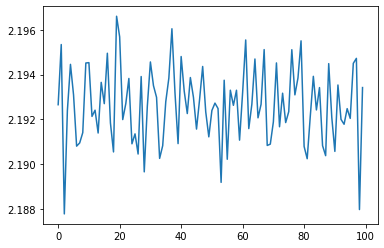

In [22]:
#train on rnn_noZeroInit with a bigger learning rate
n_hidden = 128
rnn_noZeroInit2 = RNN_noZeroInit(n_letters, n_hidden, n_categories)
train_model(all_categories,category_lines,rnn_noZeroInit,learning_rate=0.005)